In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('dados.csv')

Agora que os dados estão tratados podemos definir um plano inicial de que casas iremos comprar.

Agruparemos os preços por região e dentro de cada grupo encontraremos os valores da mediana.

A sugestão então de casas para comprar será feita baseada nas casas com valores abaixo da mediana
e com uma condição boa.

Podemos também analisar as médias por região para ver se é paupável utilizar esse parâmetro, pois pode
acontecer de termos algum outlier que puxe a média para um valor muito alto ou muito baixo.

<AxesSubplot:xlabel='zipcode', ylabel='price'>

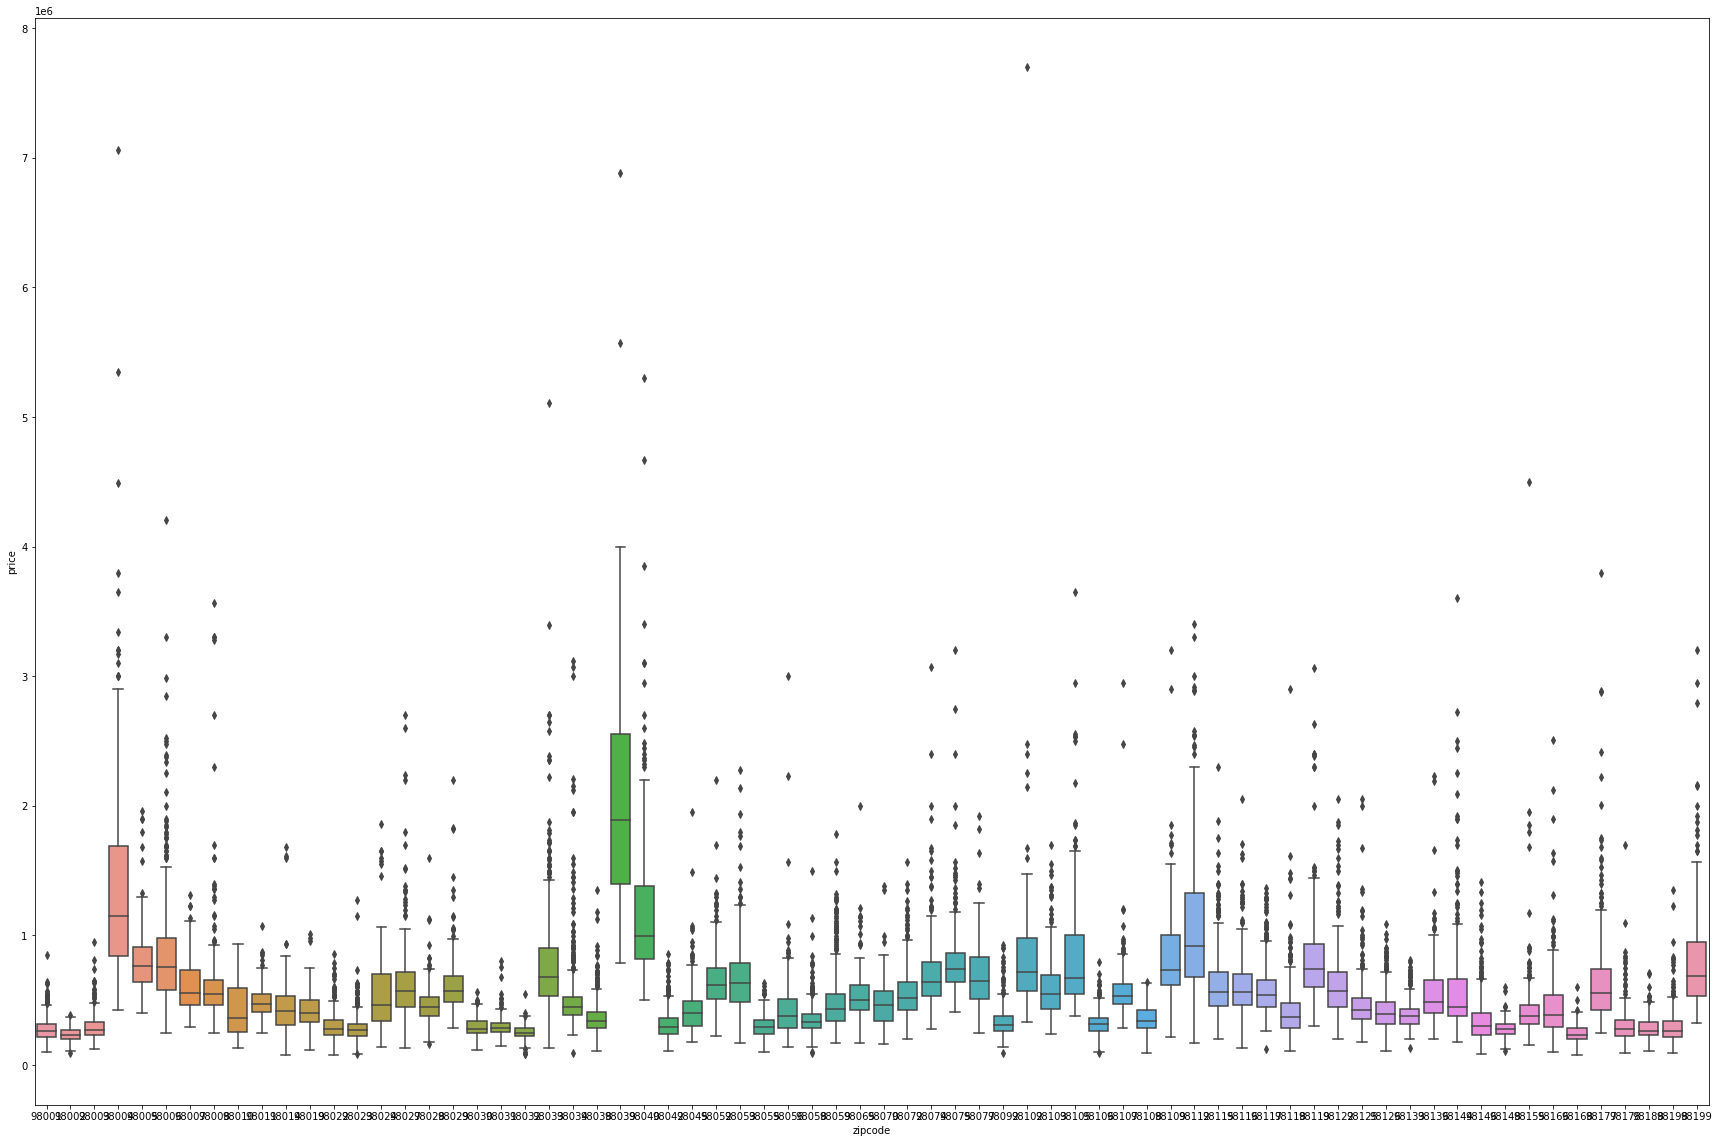

In [6]:
fig, axs = plt.subplots(figsize=(30,20))
fig.subplots_adjust(hspace=.5,wspace=.5)

sns.boxplot(x='zipcode',y='price',data=df)

Do gráfico acima podemos ver que em muitos zipcodes existem muitos outliers. Uma pergunta que fica é 
porque não o retiramos, e uma possível resposta é porque simplesmente podem existir casas de luxo nessas regiões, o que faz com que preços muito altos apareçam. Por isso não é correto remover esses dados. Nesse caso então é mais razoável usar os valores das medianas.

In [7]:
# Criando nova coluna com os valores medianos por zipcode

df2 = df[['zipcode','price']].groupby('zipcode').median().reset_index().rename(columns={'price':'price_median'})
df = df.merge(df2,how='inner',on='zipcode')

In [8]:
# Definindo que casas irão ser compradas dependendo do valor de venda comparado com o valor mediano
# Decidimos comprar as casas também que tem condição 'good' ou 'regular'

df['status'] = 'NAN'

for i in range(0,len(df)):
    if df.iloc[i][2] < df.iloc[i][25] and df.iloc[i][22] != 'bad':
        df.loc[i,['status']] = 'compra'
    else:
        df.loc[i,['status']] = 'nao_compra'

Agora precisamos utilizar os objetivos declarados no inicio do projeto.

Como a empresa é ficticia, podemos criar o objetivo mínimo que a empresa quer lucrar 30% em cima do
valor de compra do imóvel.

Decidimos comprar casas com condições regulares e boas. É uma boa hipótese dizer que casas com status
regular provavelmente precise de alguma reforma. Daí, podemos estabelecer um preço de compra abaixo do valor estabelecido pelo proprietário, que padronizarei como 10% para ser direcionado às reformas. Casas em boas condições estabelecerei que pagaremos os valores propostos pelo vendedor. Podíamos também inserir a hipótese de que o comprador nunca paga o preço cheio, e basear o novo preço proposto na diferença entre a mediana da região e o preço do vendedor, e daí inserir uma porcentagem de desconto no preço final.

Já em relação à venda existem vários fatores interessantes que podem interferir no preço final tal como: sazonalidade, número de comodos, visão para a água e etc. Como esse é um estudo introdutório, vamos inserir somente o objetivo de ter 30% + lucro na venda do imóvel + alguma porcentagem (ainda a definir) em cima do valor da compra caso o lugar tenha visão para a água.


In [9]:
# Definindo o preço de compra definindo se a casa está em condição regular ou boa

df['preco_compra'] = 0

for i in range(0,len(df)):
    if df.loc[i,'status'] == 'compra':
        if df.loc[i,'condition_type'] == 'regular':
            df.loc[i,'preco_compra'] = df.loc[i,'price']*0.9
        else:
            df.loc[i,'preco_compra'] = df.loc[i,'price']
    else:
        pass

In [10]:
# Criando novo dataframe com as colunas de interesse:

colunas = ['id','date','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
          'zipcode','lat','long','dormitory_type','preco_compra']

df_port = df[colunas].copy()
df_port['preco_compra'] = df_port['preco_compra'].replace(0,np.nan)
df_port = df_port.dropna()

In [11]:
# Criando nova coluna com os preços de venda e lucro

df_port['preco_venda'] = df_port['preco_compra']*1.3
df_port['lucro'] = df_port['preco_compra']*0.3

In [12]:
df_port

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,zipcode,lat,long,dormitory_type,preco_compra,preco_venda,lucro
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,98178,47.5112,-122.257,house,199710.0,259623.00,59913.00
1,4060000240,2014-06-23,2,1.00,880,6780,1.0,0,98178,47.5009,-122.248,apartment,184882.5,240347.25,55464.75
3,2976800796,2014-09-25,3,1.00,1300,5898,1.0,0,98178,47.5053,-122.255,house,212400.0,276120.00,63720.00
4,6874200960,2015-02-27,2,1.00,860,5265,1.0,0,98178,47.5048,-122.272,apartment,153000.0,198900.00,45900.00
5,4268200055,2015-05-01,3,1.75,1740,11547,1.0,0,98178,47.4945,-122.220,house,220500.0,286650.00,66150.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21600,3025300225,2014-10-31,5,2.75,3090,19865,1.0,0,98039,47.6232,-122.235,house,1305000.0,1696500.00,391500.00
21601,2470200020,2014-05-14,4,2.75,3260,19542,1.0,0,98039,47.6245,-122.236,house,1692000.0,2199600.00,507600.00
21603,3625049079,2014-08-01,3,2.00,2070,9600,1.0,0,98039,47.6160,-122.239,house,1215000.0,1579500.00,364500.00
21605,5427100150,2014-06-26,4,2.25,3250,16684,2.0,0,98039,47.6334,-122.229,house,1269000.0,1649700.00,380700.00


In [ ]:
# Salvando

df_port.to_csv(f"dados_port.csv",index=False)

In [15]:
df_port['dormitory_type'].astype(int)

ValueError: invalid literal for int() with base 10: 'house'